In [15]:
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def generate_tsne_molecular_similarities(train_dataset, valid_dataset, test_dataset):
    # Create a function to compute molecular fingerprints
    def compute_fingerprint(smiles):
        molecule = Chem.MolFromSmiles(smiles)
        fingerprint = AllChem.GetMorganFingerprintAsBitVect(molecule, 2, nBits=1024)
        return fingerprint

    # Compute molecular fingerprints for each molecule in the combined dataset
    fingerprints = [compute_fingerprint(smiles) for smiles in train_dataset.smiles]
    fingerprints.extend([compute_fingerprint(smiles) for smiles in valid_dataset.smiles])
    fingerprints.extend([compute_fingerprint(smiles) for smiles in test_dataset.smiles])

    similarity_matrix = np.zeros((len(fingerprints), len(fingerprints)))
    # Compute molecular similarities using Tanimoto coefficient
    for i in range(len(fingerprints)):
        for j in range(i + 1, len(fingerprints)):
            similarity = DataStructs.TanimotoSimilarity(fingerprints[i], fingerprints[j])
            similarity_matrix[i, j] = similarity
            similarity_matrix[j, i] = similarity

    # Apply t-SNE to reduce the dimensionality
    tsne = TSNE(n_components=2, random_state=42, n_jobs=10)
    tsne_embeddings = tsne.fit_transform(similarity_matrix)
    # Separate the embeddings based on the original datasets
    dataset1_embeddings = tsne_embeddings[:len(train_dataset.smiles)]
    dataset2_embeddings = tsne_embeddings[len(train_dataset.smiles):len(valid_dataset.smiles) + len(train_dataset.smiles)]
    dataset3_embeddings = tsne_embeddings[len(valid_dataset.smiles) + len(train_dataset.smiles):]

    return dataset1_embeddings, dataset2_embeddings, dataset3_embeddings

In [1]:
import pandas as pd

test = pd.read_csv("test.csv")
train = pd.read_csv("train_val.csv")

pd.concat([train, test]).to_csv("dataset.csv", index=False)

/tmp/ipykernel_249851/2238999042.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from deepmol.loaders import CSVLoader

dataset = CSVLoader(dataset_path="dataset.csv", smiles_field="Drug", labels_fields=["Y"], id_field="Drug_ID").create_dataset()

2024-02-27 15:17:24,376 — INFO — Assuming classification since there are less than 10 unique y values. If otherwise, explicitly set the mode to 'regression'!


In [16]:
from deepmol.splitters import SimilaritySplitter

similarity_splitter = SimilaritySplitter()

train_dataset, valid_dataset, test_dataset = similarity_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.1, frac_test=0.1, homogenous_threshold=0.3)

In [18]:
dataset1_embeddings, dataset2_embeddings, dataset3_embeddings = generate_tsne_molecular_similarities(train_dataset, valid_dataset, test_dataset)

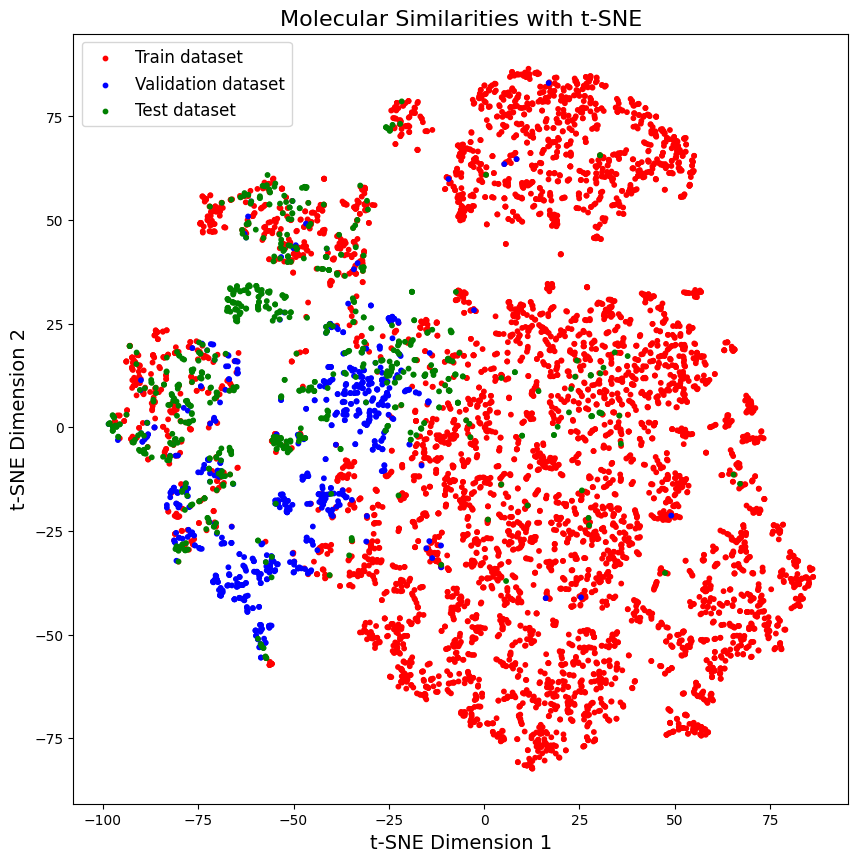

In [20]:
# increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot the embeddings with different colors for each dataset
plt.scatter(dataset1_embeddings[:, 0], dataset1_embeddings[:, 1], c='red', label='Train dataset', s=[10]*len(dataset1_embeddings))
plt.scatter(dataset2_embeddings[:, 0], dataset2_embeddings[:, 1], c='blue', label='Validation dataset', s=[10]*len(dataset2_embeddings))
plt.scatter(dataset3_embeddings[:, 0], dataset3_embeddings[:, 1], c='green', label='Test dataset', s=[10]*len(dataset3_embeddings))
plt.legend(prop={'size': 12})
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.title('Molecular Similarities with t-SNE', fontsize=16)
plt.savefig("tsne_03_similarity.png")

In [21]:
from deepmol.splitters import SimilaritySplitter

similarity_splitter = SimilaritySplitter()

train_dataset, valid_dataset, test_dataset = similarity_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.1, frac_test=0.1, homogenous_threshold=0.7)

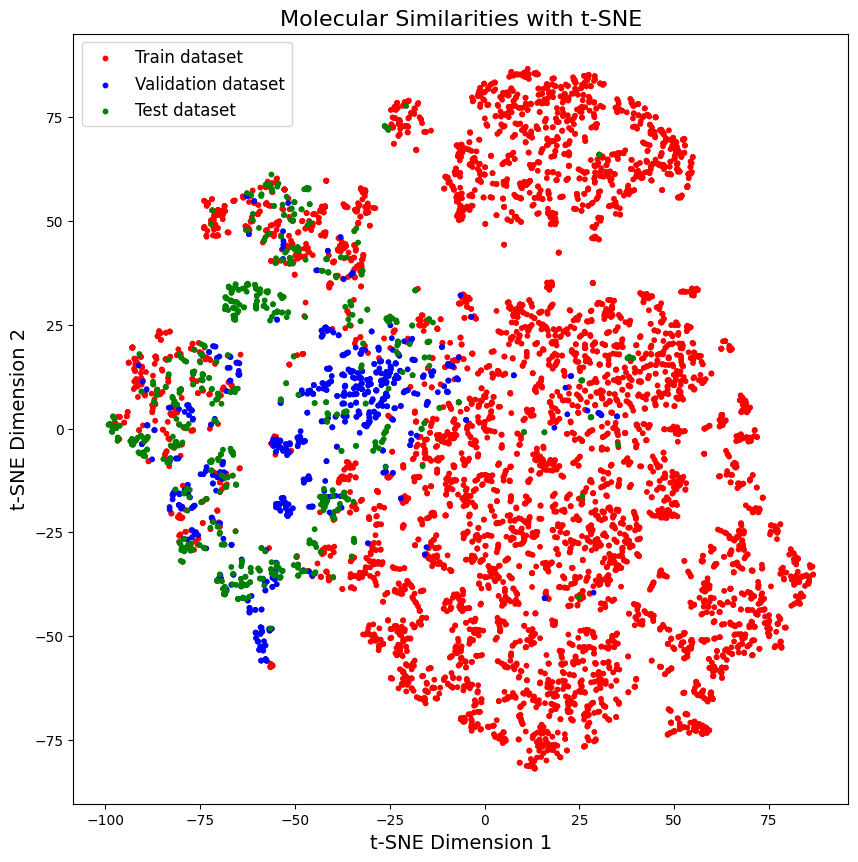

In [22]:
dataset1_embeddings, dataset2_embeddings, dataset3_embeddings = generate_tsne_molecular_similarities(train_dataset, valid_dataset, test_dataset)
# increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot the embeddings with different colors for each dataset
plt.scatter(dataset1_embeddings[:, 0], dataset1_embeddings[:, 1], c='red', label='Train dataset', s=[10]*len(dataset1_embeddings))
plt.scatter(dataset2_embeddings[:, 0], dataset2_embeddings[:, 1], c='blue', label='Validation dataset', s=[10]*len(dataset2_embeddings))
plt.scatter(dataset3_embeddings[:, 0], dataset3_embeddings[:, 1], c='green', label='Test dataset', s=[10]*len(dataset3_embeddings))
plt.legend(prop={'size': 12})
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.title('Molecular Similarities with t-SNE', fontsize=16)
plt.savefig("tsne_07_similarity.png")

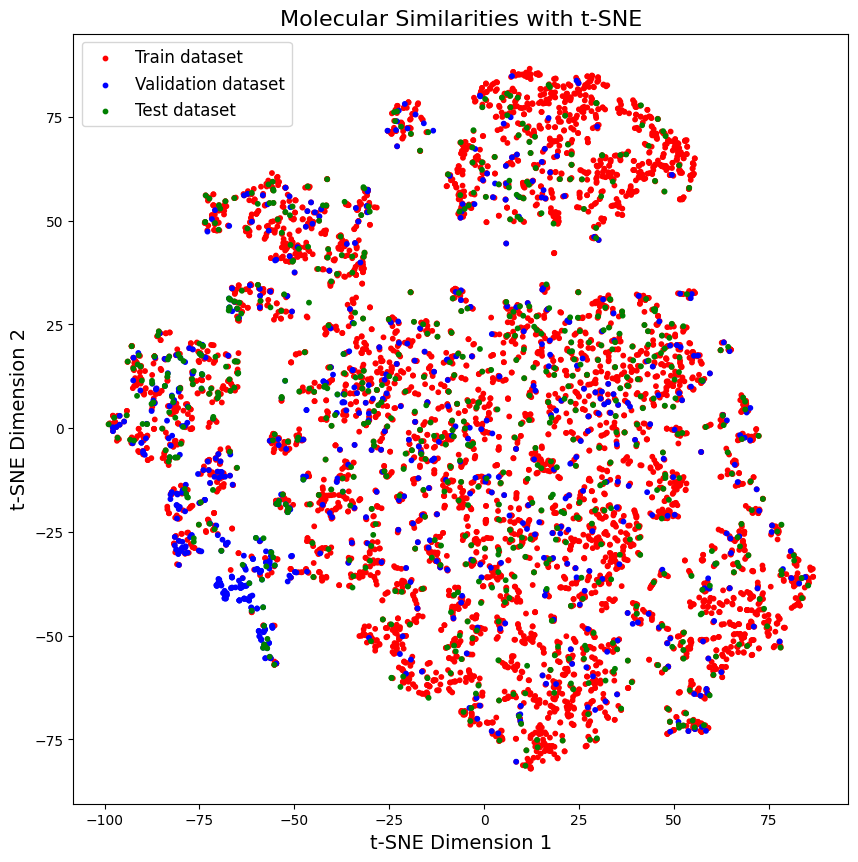

In [26]:
from deepmol.splitters import SimilaritySplitter

similarity_splitter = SimilaritySplitter()

train_dataset, valid_dataset, test_dataset = similarity_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.1, frac_test=0.1, homogenous_threshold=0.10)
dataset1_embeddings, dataset2_embeddings, dataset3_embeddings = generate_tsne_molecular_similarities(train_dataset, valid_dataset, test_dataset)
# increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot the embeddings with different colors for each dataset
plt.scatter(dataset1_embeddings[:, 0], dataset1_embeddings[:, 1], c='red', label='Train dataset', s=[10]*len(dataset1_embeddings))
plt.scatter(dataset2_embeddings[:, 0], dataset2_embeddings[:, 1], c='blue', label='Validation dataset', s=[10]*len(dataset2_embeddings))
plt.scatter(dataset3_embeddings[:, 0], dataset3_embeddings[:, 1], c='green', label='Test dataset', s=[10]*len(dataset3_embeddings))
plt.legend(prop={'size': 12})
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.title('Molecular Similarities with t-SNE', fontsize=16)
plt.savefig("tsne_01_similarity.png")

In [ ]:
from deepmol.splitters import SimilaritySplitter

similarity_splitter = SimilaritySplitter()

train_dataset, valid_dataset, test_dataset = similarity_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.1, frac_test=0.1, homogenous_threshold=0.98)
dataset1_embeddings, dataset2_embeddings, dataset3_embeddings = generate_tsne_molecular_similarities(train_dataset, valid_dataset, test_dataset)
# increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot the embeddings with different colors for each dataset
plt.scatter(dataset1_embeddings[:, 0], dataset1_embeddings[:, 1], c='red', label='Train dataset', s=[10]*len(dataset1_embeddings))
plt.scatter(dataset2_embeddings[:, 0], dataset2_embeddings[:, 1], c='blue', label='Validation dataset', s=[10]*len(dataset2_embeddings))
plt.scatter(dataset3_embeddings[:, 0], dataset3_embeddings[:, 1], c='green', label='Test dataset', s=[10]*len(dataset3_embeddings))
plt.legend(prop={'size': 12})
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.title('Molecular Similarities with t-SNE', fontsize=16)
plt.savefig("tsne_98_similarity.png")

In [67]:
molecules = []
for i, embedding in enumerate(dataset1_embeddings):
    if -50 < embedding[0] < -25 and 0 < embedding[1] < 25:
        molecules.append(train_dataset.mols[i])

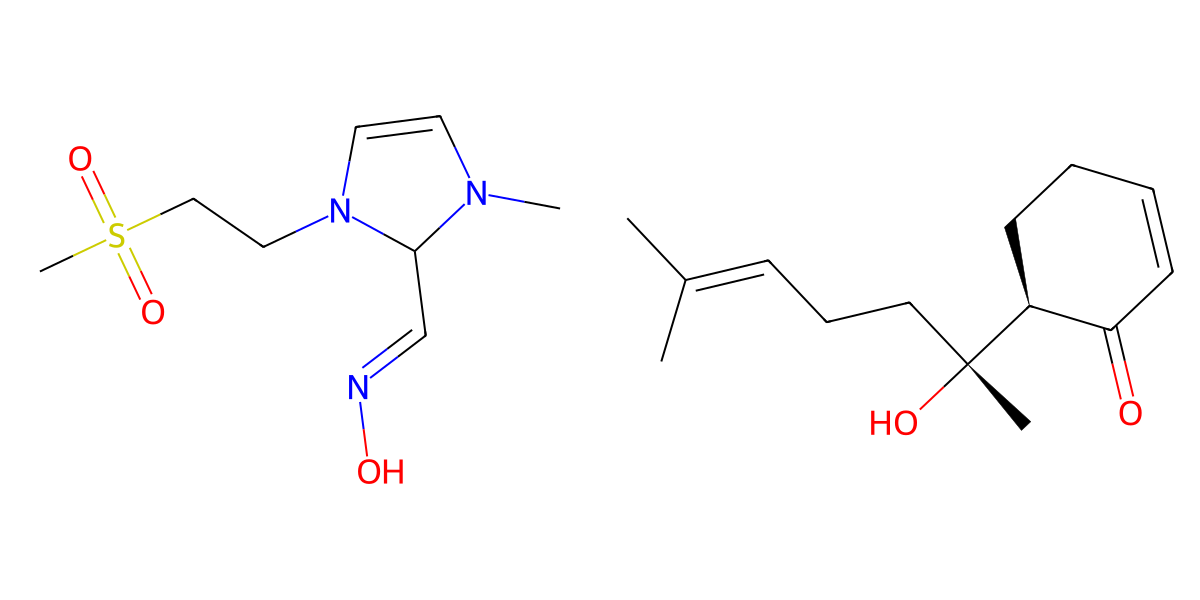

In [73]:
from rdkit.Chem import Draw

img = Draw.MolsToGridImage([molecules[0], molecules[15
]], molsPerRow=2, subImgSize=(600,600))
img

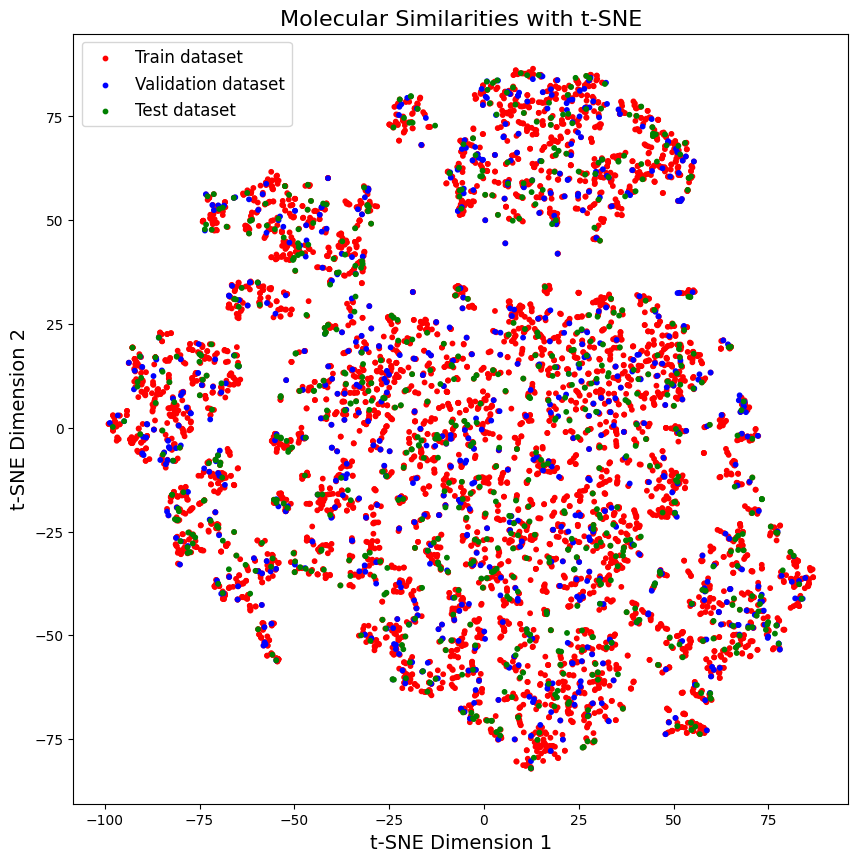

In [77]:
from deepmol.splitters import ScaffoldSplitter

similarity_splitter = ScaffoldSplitter()

train_dataset, valid_dataset, test_dataset = similarity_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.1, frac_test=0.1, homogenous_datasets=True)
dataset1_embeddings, dataset2_embeddings, dataset3_embeddings = generate_tsne_molecular_similarities(train_dataset, valid_dataset, test_dataset)
# increase the size of the plot
plt.figure(figsize=(10, 10))

# Plot the embeddings with different colors for each dataset
plt.scatter(dataset1_embeddings[:, 0], dataset1_embeddings[:, 1], c='red', label='Train dataset', s=[10]*len(dataset1_embeddings))
plt.scatter(dataset2_embeddings[:, 0], dataset2_embeddings[:, 1], c='blue', label='Validation dataset', s=[10]*len(dataset2_embeddings))
plt.scatter(dataset3_embeddings[:, 0], dataset3_embeddings[:, 1], c='green', label='Test dataset', s=[10]*len(dataset3_embeddings))
plt.legend(prop={'size': 12})
plt.xlabel('t-SNE Dimension 1', fontsize=14)
plt.ylabel('t-SNE Dimension 2', fontsize=14)
plt.title('Molecular Similarities with t-SNE', fontsize=16)
plt.savefig("tsne_homogeneous_scaffold.png")

In [84]:
from rdkit.Chem.Scaffolds.MurckoScaffold import MurckoScaffoldSmiles
from rdkit.Chem import MolFromSmiles

train_dataset, valid_dataset, test_dataset = similarity_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.1, frac_test=0.1, homogenous_datasets=False)

train_scaffolds = list(set([MurckoScaffoldSmiles(mol=mol, includeChirality=False) for mol in train_dataset.mols]))
train_scaffolds = [MolFromSmiles(scaffold) for scaffold in train_scaffolds]
valid_scaffolds = list(set([MurckoScaffoldSmiles(mol=mol, includeChirality=False) for mol in valid_dataset.mols]))
valid_scaffolds = [MolFromSmiles(scaffold) for scaffold in valid_scaffolds]
test_scaffolds = list(set([MurckoScaffoldSmiles(mol=mol, includeChirality=False) for mol in test_dataset.mols]))
test_scaffolds = [MolFromSmiles(scaffold) for scaffold in test_scaffolds]

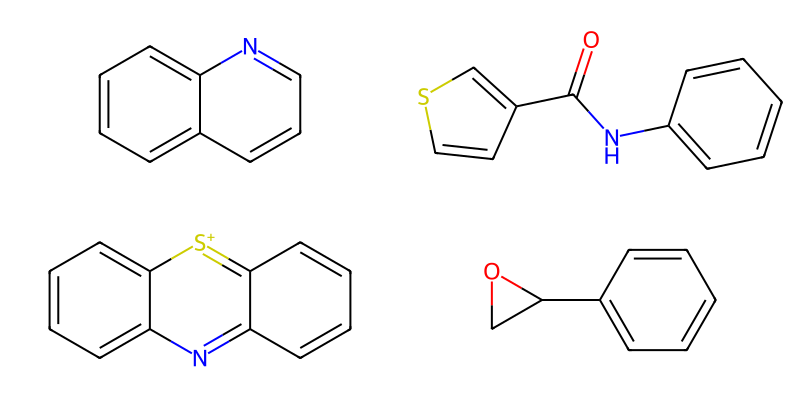

In [104]:
from rdkit.Chem import Draw
set(train_scaffolds)

img = Draw.MolsToGridImage(train_scaffolds[5:9], molsPerRow=2, subImgSize=(400,200))
img

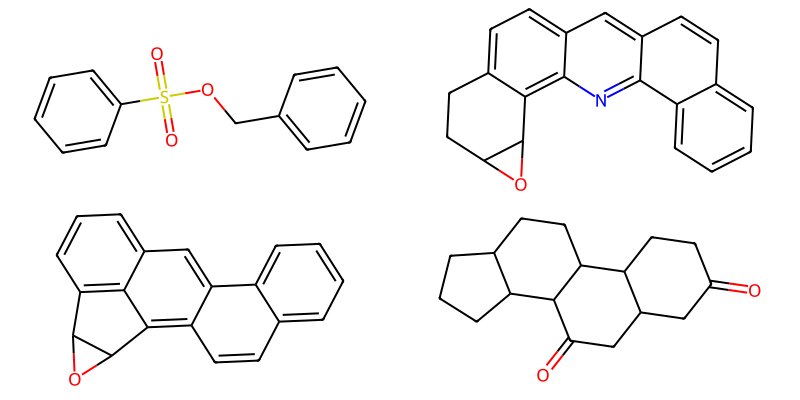

In [105]:
from rdkit.Chem import Draw

img = Draw.MolsToGridImage(test_scaffolds[7:11], molsPerRow=2, subImgSize=(400,200))
img

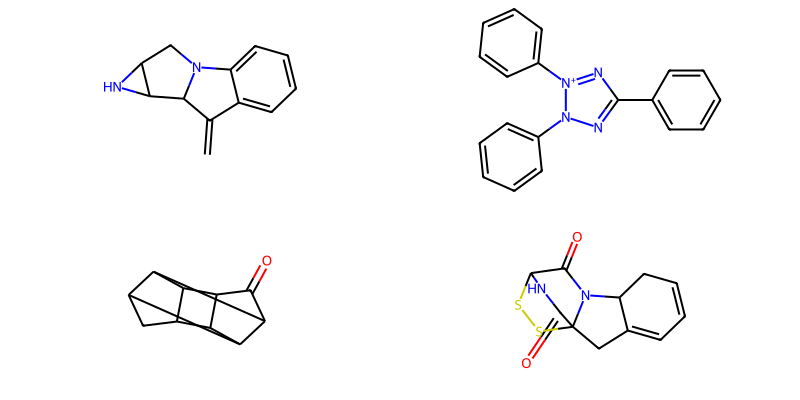

In [108]:
from rdkit.Chem import Draw

img = Draw.MolsToGridImage(valid_scaffolds[11:15], molsPerRow=2, subImgSize=(400,200))
img

In [8]:
from deepmol.scalers import MinMaxScaler
from deepmol.loaders import CSVLoader
from deepmol.compound_featurization import TwoDimensionDescriptors, TanimotoSimilarityMatrix

dataset = TwoDimensionDescriptors().featurize(dataset)
MinMaxScaler().fit_transform(dataset)

In [15]:
from deepmol.loaders import CSVLoader

dataset = CSVLoader(dataset_path="train_val_bio.csv", smiles_field="Drug", labels_fields=["Y"], id_field="Drug_ID").create_dataset()

2024-02-27 15:34:13,040 — INFO — Assuming classification since there are less than 10 unique y values. If otherwise, explicitly set the mode to 'regression'!


In [16]:
from deepmol.splitters import SimilaritySplitter

similarity_splitter = SimilaritySplitter()

train_dataset, valid_dataset, test_dataset = similarity_splitter.train_valid_test_split(dataset, frac_train=0.8, frac_valid=0.1, frac_test=0.1, homogenous_threshold=0.05)

In [32]:
from deepmol.pipeline import Pipeline
from deepmol.models import SklearnModel
from deepmol.compound_featurization import MorganFingerprint, MACCSkeysFingerprint, RDKFingerprint
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier

model = SklearnModel(RidgeClassifier())
pipeline = Pipeline(steps=[("featurization", MorganFingerprint()), ("model", model)])
pipeline.fit(train_dataset)


In [18]:
train_dataset.get_shape()

2024-02-27 15:34:34,503 — INFO — Mols_shape: (409,)
2024-02-27 15:34:34,506 — INFO — Features_shape: None
2024-02-27 15:34:34,508 — INFO — Labels_shape: (409,)


((409,), None, (409,))

In [33]:
from deepmol.feature_importance import ShapValues

# compute shap values
shap_calc = ShapValues()
train_dataset = pipeline.transform(train_dataset)
shap_calc.fit(train_dataset, model, feature_names=valid_dataset.feature_names)

2024-02-27 16:07:11,620 — ERROR — Error while computing SHAP values: max_evals=500 is too low for the Permutation explainer, it must be at least 2 * num_features + 1 = 2451!. Using shap_values method instead.


X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
PermutationExplainer explainer:   0%|          | 1/409 [00:00<?, ?it/s]X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier was fitted without feature names
X has feature names, but RidgeClassifier 

KeyboardInterrupt: 

In [31]:
shap_calc.values

AttributeError: 'ShapValues' object has no attribute 'values'